# 1.data input

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving iris.data to iris.data


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd  
headerlist = ["sepal_Length","sepal_Width","petal_Length","petal_Width","class"]
df = pd.read_csv('iris.data',names = headerlist) 
print(df) #print all data

     sepal_Length  sepal_Width  petal_Length  petal_Width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# 2.data visualization


 Iris-setosa :

 +--------------------+----------------+---------------+----------------+---------------+
| type               |   sepal_Length |   sepal_Width |   petal_Length |   petal_Width |
+====================+================+===============+================+===============+
| average            |        5.006   |      3.418    |       1.464    |       0.244   |
+--------------------+----------------+---------------+----------------+---------------+
| standard deviation |        0.35249 |      0.381024 |       0.173511 |       0.10721 |
+--------------------+----------------+---------------+----------------+---------------+

 Iris-versicolor :

 +--------------------+----------------+---------------+----------------+---------------+
| type               |   sepal_Length |   sepal_Width |   petal_Length |   petal_Width |
+====================+================+===============+================+===============+
| average            |       5.936    |      2.77     |       4.26    

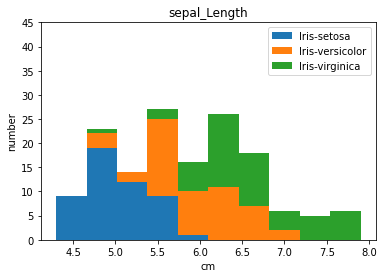

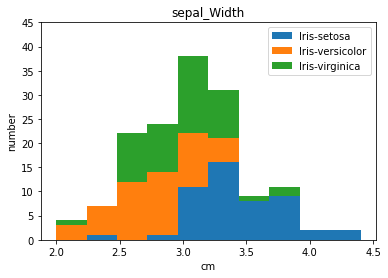

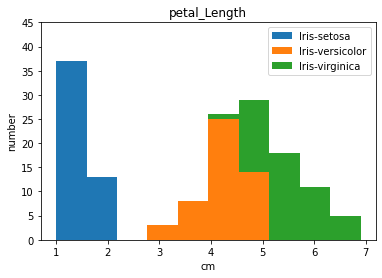

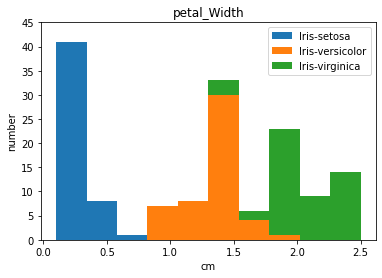

In [ ]:
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt 
from tabulate import tabulate

def show_data(flower_class):
  print("\n",flower_class,":")
  data = [["average", "{}".format(df[df['class']==flower_class].mean()[0]), "{}".format(df[df['class']==flower_class].mean()[1]),
        "{}".format(df[df['class']==flower_class].mean()[2]), "{}".format(df[df['class']==flower_class].mean()[3])],
      ["standard deviation", "{}".format(df[df['class']==flower_class].std()[0]), "{}".format(df[df['class']==flower_class].std()[1]),
        "{}".format(df[df['class']==flower_class].std()[2]), "{}".format(df[df['class']==flower_class].std()[3])]]
  head = ["type", "sepal_Length","sepal_Width","petal_Length","petal_Width"]
  print("\n",tabulate(data, headers=head, tablefmt="grid"))

show_data("Iris-setosa")
show_data("Iris-versicolor")
show_data("Iris-virginica")

def draw_hist(feature):
  df_tmp1 = df[df['class']=='Iris-setosa']
  df_tmp2 = df[df['class']=='Iris-versicolor']
  df_tmp3 = df[df['class']=='Iris-virginica']
  class_type = ['Iris-setosa','Iris-versicolor','Iris-virginica']
  plt.hist([df_tmp1[feature],df_tmp2[feature],df_tmp3[feature]],label=class_type,stacked=True,bins=10)
  plt.title(feature)
  plt.xlabel('cm')
  plt.ylabel('number')
  plt.legend()
  plt.ylim(0,45)
  plt.show()

draw_hist("sepal_Length")
draw_hist("sepal_Width")
draw_hist("petal_Length")
draw_hist("petal_Width")

# 3.data processing

In [ ]:
#print data to prove not need to drop
print(df.isnull().sum())

#shuffle data
from sklearn.utils import shuffle #shuffle the data
df_shuff = shuffle(df)

sepal_Length    0
sepal_Width     0
petal_Length    0
petal_Width     0
class           0
dtype: int64


# 4.Model Construction

In [ ]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB() 

# 5-1.Train-Test-Split(holdout validation)

In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# 5-2.Train-Test-Split(K-fold cross validation)

In [ ]:
n = int(df_shuff.shape[0]/3)
part1=df_shuff.iloc[0:n]
part2=df_shuff.iloc[n:2*n]
part3=df_shuff.iloc[2*n:df_shuff.shape[0]]
fold1=part1.append(part2)
fold2=part1.append(part3)
fold3=part2.append(part3)

fold1_X_train = fold1.drop(["class"], axis=1)
fold1_y_train = fold1["class"]
fold1_X_test = part3.drop(["class"], axis=1)
fold1_y_test = part3["class"]

fold2_X_train = fold2.drop(["class"], axis=1)
fold2_y_train = fold2["class"]
fold2_X_test = part2.drop(["class"], axis=1)
fold2_y_test = part2["class"]

fold3_X_train = fold3.drop(["class"], axis=1)
fold3_y_train = fold3["class"]
fold3_X_test = part1.drop(["class"], axis=1)
fold3_y_test = part1["class"]

# 6-1.Results(holdout validation)

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from tabulate import tabulate

model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)
print("holdout with gaussianNB:\n")
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_model))
hold_acc = round(accuracy_score(y_test, y_pred_model)*100,2)
hold_rec = round(sklearn.metrics.recall_score(y_test,y_pred_model,average='micro')*100,2)
hold_pre = round(sklearn.metrics.precision_score(y_test,y_pred_model,average='micro')*100,2)

data = [["gaussionNB holdout validation", "{}%".format(hold_acc), "{}%".format(hold_rec), "{}%".format(hold_pre)] ]
head = ["Model Name", "Accuracy", "Sensitivity(Recall)", "Precision"]
print("\n",tabulate(data, headers=head, tablefmt="grid"))


holdout with gaussianNB:

confusion matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]

 +-------------------------------+------------+-----------------------+-------------+
| Model Name                    | Accuracy   | Sensitivity(Recall)   | Precision   |
+===============================+============+=======================+=============+
| gaussionNB holdout validation | 100.0%     | 100.0%                | 100.0%      |
+-------------------------------+------------+-----------------------+-------------+


# 6-2.Results(K-fold validation)

In [ ]:
from sklearn.metrics import classification_report

model.fit(fold1_X_train, fold1_y_train)
fold1_y_pred_model = model.predict(fold1_X_test)
fold1_c = confusion_matrix(fold1_y_test, fold1_y_pred_model)
fold1_acc = round(accuracy_score(fold1_y_test, fold1_y_pred_model)*100,2)
fold1_rec = round(sklearn.metrics.recall_score(fold1_y_test,fold1_y_pred_model,average='micro')*100,2)
fold1_pre = round(sklearn.metrics.precision_score(fold1_y_test,fold1_y_pred_model,average='micro')*100,2)

model.fit(fold2_X_train, fold2_y_train)
fold2_y_pred_model = model.predict(fold2_X_test)
fold2_c = confusion_matrix(fold2_y_test, fold2_y_pred_model)
fold2_acc = round(accuracy_score(fold2_y_test, fold2_y_pred_model)*100,2)
fold2_rec = round(sklearn.metrics.recall_score(fold2_y_test,fold2_y_pred_model,average='micro')*100,2)
fold2_pre = round(sklearn.metrics.precision_score(fold2_y_test,fold2_y_pred_model,average='micro')*100,2)

model.fit(fold3_X_train, fold3_y_train)
fold3_y_pred_model = model.predict(fold3_X_test)
fold3_c = confusion_matrix(fold3_y_test, fold3_y_pred_model)
fold3_acc = round(accuracy_score(fold3_y_test, fold3_y_pred_model)*100,2)
fold3_rec = round(sklearn.metrics.recall_score(fold3_y_test,fold3_y_pred_model,average='micro')*100,2)
fold3_pre = round(sklearn.metrics.precision_score(fold3_y_test,fold3_y_pred_model,average='micro')*100,2)

c_ave = (fold1_c+fold2_c+fold3_c)/3
print("K-fold with gaussianNB:\n")
print("confusion matrix:")
print(c_ave)
acc_ave = round((fold1_acc+fold2_acc+fold3_acc)/3,2)
rec_ave = round((fold1_rec+fold2_rec+fold3_rec)/3,2)
pre_ave = round((fold1_pre+fold2_pre+fold3_pre)/3,2) 

data = [["K-fold with gaussianNB", "{}%".format(acc_ave), "{}%".format(rec_ave), "{}%".format(pre_ave)] ]
head = ["Model Name", "Accuracy", "Sensitivity(Recall)", "Precision"]
print("\n",tabulate(data, headers=head, tablefmt="grid"))

K-fold with gaussianNB:

confusion matrix:
[[16.66666667  0.          0.        ]
 [ 0.         15.33333333  1.33333333]
 [ 0.          1.         15.66666667]]

 +------------------------+------------+-----------------------+-------------+
| Model Name             | Accuracy   | Sensitivity(Recall)   | Precision   |
+========================+============+=======================+=============+
| K-fold with gaussianNB | 95.33%     | 95.33%                | 95.33%      |
+------------------------+------------+-----------------------+-------------+


# 8.Questions


 Iris-versicolor :

 +--------------------+----------------+
| type               |   petal_Length |
+====================+================+
| average            |       4.26     |
+--------------------+----------------+
| standard deviation |       0.469911 |
+--------------------+----------------+


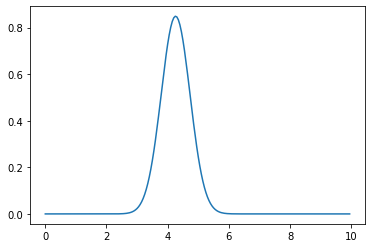

In [ ]:
import math 
pi = 3.1415926
Probability = []
def show_data(flower_class):
  print("\n",flower_class,":")
  data_mean = df[df['class']==flower_class].mean()[2]
  data_std = df[df['class']==flower_class].std()[2]
  data = [["average","{}".format(data_mean)],
      ["standard deviation","{}".format(data_std)]]
  head = ["type","petal_Length"]
  print("\n",tabulate(data, headers=head, tablefmt="grid"))
  df_tmp = df[df['class']==flower_class]
  x = []
  for i in range(200):
    t = i*0.05
    x.append(t)
  x_u2 = (x - data_mean) ** 2
  data_std_2 = 2 * (data_std ** 2)
  mother = data_std * math.sqrt(2 * pi)
  data_div = x_u2/data_std_2
  
  for i in range(data_div.shape[0]):
    p = math.exp(-1*data_div[i])/mother
    Probability.append(p) 
  
  plt.plot(x,Probability)
  plt.show()
  #plt.plot(np.array([0, 3*std]),np.array(Probability))
  #plt.hist(Probability,x,bins=10)
  #plt.show()
show_data("Iris-versicolor")